# 6. Decision Trees and Ensemble Learning


This week, we'll talk about decision trees and tree-based ensemble algorithms

## 6.1 Credit risk scoring project

* Dataset: https://github.com/gastonstat/CreditScoring

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 6.2 Data cleaning and preparation

* Downloading the dataset
* Re-encoding the categorical variables
* Doing the train/validation/test split

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

In [3]:
!wget $data

--2022-10-24 22:11:38--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv’

CreditScoring.csv   100%[===================>] 178.21K  --.-KB/s    in 0.06s   

2022-10-24 22:11:38 (3.13 MB/s) - ‘CreditScoring.csv’ saved [182489/182489]



Lets look at the raw CSV file: 

In [4]:
!head CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
1,0,1,36,26,1,1,1,46,107,0,0,310,910
1,1,2,60,36,2,1,1,75,214,3500,0,650,1645
1,29,2,60,44,2,1,1,75,125,10000,0,1600,1800
1,9,5,12,27,1,1,1,35,80,0,0,200,1093
1,0,2,60,32,2,1,3,90,107,15000,0,1200,1957


Lets load this as a dataframe:

In [5]:
df = pd.read_csv(data)
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


Notice that there are capitals in the column names. Also, some categorical variables are encoded as numbers (Status, Marital, etc). Want different encoding. Starting with column names:

In [6]:
df.columns = df.columns.str.lower()

Now we handle the categorical variables. Notice there are missing values encoded as 999999999. Code is given in R to adjust categorical variables.

```
# change factor levels (i.e. categories)
levels(dd$Status) = c("good", "bad")
levels(dd$Home) = c("rent", "owner", "priv", "ignore", "parents", "other")
levels(dd$Marital) = c("single", "married", "widow", "separated", "divorced")
levels(dd$Records) = c("no_rec", "yes_rec")
levels(dd$Job) = c("fixed", "partime", "freelance", "others")
```

Now we want to translate these into the above categories. Doublechecking there are only two classes in status:

In [7]:
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

Mapping the values with status using a dictionary:

In [8]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)

Checking the dataframe:

In [9]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


Looks okay. Let's do the same for the other categorical features. We can pull from homework 04.

In [10]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

Take a look:

In [11]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


Lets look at the statistics of the continuous variables:

In [12]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


Income, assets and debt have missing numbers, so we will replace these with NaN:

In [13]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [14]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


There are a bunch of 0's, which are also missing values. Taking a closer look:

In [15]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

Want to fixed indexing that was broken by 'unk':

In [16]:
df = df[df.status != 'unk'].reset_index(drop=True)

Doing train/val/test splitting:

In [17]:
from sklearn.model_selection import train_test_split

# Using random state 11 for consistency
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Want 'default' to only be be one-hot encoded:

In [19]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [20]:
del df_train['status']
del df_val['status']
del df_test['status']

Recap of our dataframe:

In [21]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


### Summary
- Removed uppercase
- Turned categorical numbers into strings
- Changed missing values to NaN
- Preformed train/val/test split

## 6.3 Decision trees

* How a decision tree looks like
* Training a decision tree 
* Overfitting
* Controlling the size of a tree

Now will use decision trees to see if customers will pay back loan. Decision tree is literally a tree structure of if/then/else statements on features.

![Decision Tree](images/6.3-tree.PNG)

This is modeled with if/then logic below:

In [22]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

Now lets take the first record and apply the function:

In [23]:
df_train.iloc[0]

seniority           10
home             owner
time                36
age                 36
marital        married
records             no
job          freelance
expenses            75
income             0.0
assets         10000.0
debt               0.0
amount            1000
price             1400
Name: 0, dtype: object

In [24]:
# Need to convert to dictionary
xi = df_train.iloc[0].to_dict()

In [25]:
assess_risk(xi)

'ok'

The client has no records but has over $6,000 in assets so this makes sense.

Now we will apply a pre-made Decision Tree Classifier:

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

Getting dictionary and fitting Dict Vectorizer as usual:

In [27]:
# Need to handle NaN values
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [28]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

Let's look at the features:

In [29]:
dv.get_feature_names()

/home/andre/anaconda3/envs/exp-tracking-env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

Continuous variables are left intact and categorical variables are specified.

Training Decision Tree:

In [30]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt.tree_.max_depth

20

Checking ROC AUC with validation data:

In [31]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [32]:
# Getting probablitity and getting AUC score
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6591297134968879

Let's check ROC AUC for the training dataset:

In [33]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

This is **overfitting**. The model has memorized the data and fails to generalize as none of the new examples do not look like what it has internalized from the training data. 

The reason this happens with Decision Trees as follows: say we have a decision tree, for customer *x<sub>i</sub>*. The model checks if home = "owner", age > 35, age < 37, job = "freelance", and debt > 0.0. The model has learned that this example defaults. When it sees a new customer has the same profile it applies this tree and incorrectly assigns them the wrong probability.
- Note: this tree is **too deep**. A tree can be as indefinitely deep to be specific, and can memorize for just a few examples.
- If a tree is restricted to be less deep, it is forced to have more general rules.

Let's see what happens when we restrict the depth:

In [34]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7054989859726213
val: 0.6685264343319367


In [35]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7761016984958594
val: 0.7389079944782155


We can see that as the depth increases, the validation score increases. By not letting the tree grow indefinitely, the model actually improves.
- Note: If we set depth=1, the model gets a bit worse.
    - This is called a **Decision strump**
    - it is only a bit worse than the overfit model.

We can see the decisions and weights with `export_text()`:

In [36]:
# Need to pass feature names from dv.get_feature_names() otherwise the decisions will be unnamed
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0



/home/andre/anaconda3/envs/exp-tracking-env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


First, it checks if the client has records. > 0.5 means no records, and <= 0.5 means there are in one-hot encoding.
If the client has records:
1. Check if job seniority <= 6.5. If so, no default. Otherwise default
2. Check if job parttime is <= 0.5 (means job is part time.). If so, default. Otherwise no default. 

![Final tree](images/6.3-final-tree.PNG)

Notably, this small tree has better ROC AUC than the tree of depth 20.

## 6.4 Decision tree learning algorithm

* Finding the best split for one column
* Finding the best split for the entire dataset
* Stopping criteria
* Decision tree learning algorithm

How does a tree come up with rules?
- Say a tree has one node, a **condition node**. This node takes a *feature*, and checks if it is more or less than a value
    - *feature* > *T*
    - There is a path for *True* and *False* for the node based on the condition
- Decisions are called **leaves**

![Conditional nodes](images/6.4-condition.png)

Let's look at this with a simple dataset:

In [37]:
# First column is assets, second column is status
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


We want to train our decision tree using our feature *assets*.
- Condition would be *assets > *T*
    - What is the best *T* for finding the target?
    - This is called a **split**: we split the dataset into two parts where the decisions holds true

![Split](images/6.4-splitting.png)

Looking at the dataframe, we need to see where we can split assets for the best *T*

![Dataframe split](images/6.4-dataframe.png)

Let's start with sorting the assets column:

In [38]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


For *assets* > *T*, what are the possible *T*'s?
- This is a decision boundary, the left and right sides should lead to default or ok
- We can split at:

In [39]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

We generally can ignore 0 and 9000 as they do not actually do splitting, but we keep 0 here as we check *<=* 

Let's check each *T* and see which is better.

In [40]:
# Need this do display values that are not the last statement in the cell
from IPython.display import display

In [41]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    display(df_right)

0


,assets,status
2,0,default


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


2000


,assets,status
1,2000,default
2,0,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


3000


,assets,status
1,2000,default
2,0,default
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
0,8000,default
6,9000,ok


8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
6,9000,ok


How do we know which split is the best? 
- Take T=4000:

In [42]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

print("assets <= 4000")
display(df_left)
print("assets > 4000")
display(df_right)

assets <= 4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


assets > 4000


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


Let's look at **misclassification rate** for these.
- For <= 4000:
    - 3 default, 1 ok
    - 1/4 error rate
- For > 4000:
    - 3 ok, 1 default
    - 1/4 error rate

This is how we evaluate the quality of the split. We can say for *T* = 4000, average misclassification rate is 25%.
- Can also take weighted average, say for class imbalance.
- Won't take weighted average, but this is how it is done in practice

We can do it programmatically:

In [43]:
display(df_left)
print(df_left.status.value_counts(normalize=True))
display(df_right)
print(df_left.status.value_counts(normalize=True))

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


default    0.75
ok         0.25
Name: status, dtype: float64


Here we can see error rate is 25% for both splits, so overall rate is 25%.

In [44]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    print()

0


,assets,status
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64



Misclassification rate is a type of **impurity**. Purity is a way of seeing how accurate each decision leaf is.

![Impurity](images/6.4-impurity.png)

Let's take a look at each *T*, and organize impurity and decisions for left and right leaf, and average:

| *T*   | Decision Left  | Impurity Left  | Decision Right  | Impurity Right  | Average  |
|-------|----------------|----------------|-----------------|-----------------|----------|
| 0     | Default        |  0%            |  OK             | 43%             | 21%      |
| 2,000 | Default        |  0%            |  OK             | 33%             | 16%      |
| 3,000 | Default        |  0%            |  OK             | 30%             | 10%      |
| 4,000 | Default        |  25%           |  OK             | 25%             | 25%      |
| 5,000 | Default        |  50%           |  OK             | 50%             | 50%      |
| 8,000 | Default        |  43%           |  OK             |  0%             | 21%      |

Best *T*: 3000, Impurity: 10%

So our method is to compute every split, calculate the average impurity, and choose the split with the lowest impurity.

![`Asset` stump](images/6.4-asset-stump.PNG)

Let's try this with two features. Adding the debt feature:

In [45]:
# data = [[assets, debt, status]]
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


Splitting by debt:

In [46]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


So we have thresholds 500, 1,000 and 2,000 for *debt*

In [47]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

Now let's check each split for each feature:

In [48]:
for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.666667
default    0.333333
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default


default    1.0
Name: status, dtype: float64

#####################


Now let's create a table for *debt* as well.

| *T*   | Decision Left  | Impurity Left  | Decision Right  | Impurity Right  | Average  |
|-------|----------------|----------------|-----------------|-----------------|----------|
| 0     | Default        |  0%            |  OK             | 43%             | 21%      |
| 2,000 | Default        |  0%            |  OK             | 33%             | 16%      |
| 3,000 | Default        |  0%            |  OK             | 30%             | 10%      |
| 4,000 | Default        |  25%           |  OK             | 25%             | 25%      |
| 5,000 | Default        |  50%           |  OK             | 50%             | 50%      |
| 8,000 | Default        |  43%           |  OK             |  0%             | 21%      |

| *T*   | Decision Left  | Impurity Left  | Decision Right  | Impurity Right  | Average  |
|-------|----------------|----------------|-----------------|-----------------|----------|
| 500   | OK             |  0%            |  Default        | 43%             | 21%      |
| 1,000 | OK             |  33%           |  Default        |  0%             | 16%      |
| 2,000 | OK             |  43%           |  Default        |  0%             | 21%      |

So we can see that *debt* is not as useful as *assets*, so the best split is still *assets* > 3,000

### Finding the best split algorithm
- For *F* in Features:
    - Find all Thresholds for *F*
    - For *T* in Thresholds:
        - Split dataset using "*F* > *T*" condition
        - Compute the impurity of the split
- Select the condition with the lowest impurity

So, say we have a dataframe with 800 records.
- We split it into 300 and 500 records for the left and right
- Recursively apply algorithm to the left and right
- How do we know when to stop applying recursively?

Need *stopping criteria**:
- Group already pure
    - For example, the 300 record group has 0% impurity, so splitting again does not make sense
- Max depth parameter
    - Hitting reaches depth limit specified by user
- Minimum group size parameter
    - Hitting group size limit specified by user

### Decision tree learning Algorithm
- Find the best split
- Stop if `max_depth` is reached
- If left is sufficiently large *and* not pure:
    - Recursively apply algorithm for left side
- If right is sufficiently large *and* not pure:
    - Recursively apply algorithm for right side

Much more detailed in practice. Can see more in [Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/tree.html)
- Shows different impurity criteria
    - Gini
    - Entropy
    - Misclassification
- Shows how trees for regression work
    - Impurity criteria
    - Deciding splits

## 6.5 Decision trees parameter tuning

* selecting `max_depth`
* selecting `min_samples_leaf`

Recall:
- 6.3: trained our first decision tree, without restricting depth then training small trees. Weren't the best
- 6.4: Explored tree learning algorithm, and different stopping criteria.

Want to select parameters so chosen metric, say ROC AUC, is maximal. Let's look at Decision Tree parameters:

In [49]:
DecisionTreeClassifier() # Can check parameters in IDE

DecisionTreeClassifier()

```
max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    
min_samples_leaf : int or float, default=1
    The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

    - If int, then consider min_samples_leaf as the minimum number.
    - If float, then min_samples_leaf is a fraction and
        ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
```

Exploring max depth parameter:

In [50]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

# Select some possible tree depths and see AUC for each max_depth

print("depth -> score")
for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

depth -> score
   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.759
  10 -> 0.700
  15 -> 0.652
  20 -> 0.645
None -> 0.651


Best values in range depth 4-6. Best value is 5 with 76.6% score.

In practice, Alexey would select 4, as it is simpler.
- Smaller tree
- More explainable rules/less rules

Now we want to iterate over the best depths with some different minimum samples per leaf:

In [51]:
scores = []

# For each possible depth, minimum 1-200 samples per leaf for stopping
for depth in [4, 5, 6, 7, 10, 15]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        print('(%4s, %3d) -> %.3f' % (depth, s, auc))
        scores.append((depth, s, auc))

(   4,   1) -> 0.761
(   4,   5) -> 0.761
(   4,  10) -> 0.761
(   4,  15) -> 0.764
(   4,  20) -> 0.761
(   4, 500) -> 0.680
(   4, 100) -> 0.756
(   4, 200) -> 0.747
(   5,   1) -> 0.767
(   5,   5) -> 0.768
(   5,  10) -> 0.762
(   5,  15) -> 0.772
(   5,  20) -> 0.774
(   5, 500) -> 0.680
(   5, 100) -> 0.763
(   5, 200) -> 0.759
(   6,   1) -> 0.746
(   6,   5) -> 0.760
(   6,  10) -> 0.778
(   6,  15) -> 0.785
(   6,  20) -> 0.774
(   6, 500) -> 0.680
(   6, 100) -> 0.776
(   6, 200) -> 0.768
(   7,   1) -> 0.746
(   7,   5) -> 0.756
(   7,  10) -> 0.763
(   7,  15) -> 0.780
(   7,  20) -> 0.781
(   7, 500) -> 0.680
(   7, 100) -> 0.780
(   7, 200) -> 0.768
(  10,   1) -> 0.694
(  10,   5) -> 0.732
(  10,  10) -> 0.766
(  10,  15) -> 0.790
(  10,  20) -> 0.786
(  10, 500) -> 0.680
(  10, 100) -> 0.779
(  10, 200) -> 0.768
(  15,   1) -> 0.650
(  15,   5) -> 0.712
(  15,  10) -> 0.761
(  15,  15) -> 0.786
(  15,  20) -> 0.784
(  15, 500) -> 0.680
(  15, 100) -> 0.780
(  15, 200) -

Can see improvements within depth 5 by varying minimum samples per leaf, but the best scores are in a deeper tree (6).

Hard to read. Can put in dataframe and plot.

In [52]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
35,10,15,0.790330
36,10,20,0.786421
43,15,15,0.786191
19,6,15,0.785319
44,15,20,0.783585


Still hard to read. Trying in pandas pivot table:

In [53]:
# Can print this in table with df.pivot()
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                   
max_depth            4      5      6      7      10     15
min_samples_leaf                                          
1                 0.761  0.767  0.746  0.746  0.694  0.650
5                 0.761  0.768  0.760  0.756  0.732  0.712
10                0.761  0.762  0.778  0.763  0.766  0.761
15                0.764  0.772  0.785  0.780  0.790  0.786
20                0.761  0.774  0.774  0.781  0.786  0.784
100               0.756  0.763  0.776  0.780  0.779  0.780
200               0.747  0.759  0.768  0.768  0.768  0.768
500               0.680  0.680  0.680  0.680  0.680  0.680

Would likely be easiest to visualize with a *heatmap*:

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

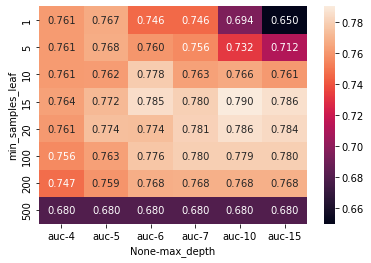

In [54]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

BEFORE INCREASING MAX DEPTH SPACE:
- Best values are *lighter*, so the best parameters are *depth* 6 and *min_samples_leaf* 15. 

**NOTE**: this is not necessarily the best way to look at values.
- Could be that larger max depths are better as we first pre-selected depths and then chose leafs with a subset of depths

Training over a lot of parameters is reasonable in a problem like this using relatively small trees and relatively little data but normally it is unreasonable to check every combination of values.

Would generally still control size of tree still as it may become too large.

Training final model with the best parameters (with restricted max depth space):

In [55]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [56]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- price <= 925.00
|   |   |   |   |--- income <= 117.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- income >  117.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- price >  925.00
|   |   |   |   |--- price <= 1382.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- price >  1382.00
|   |   |   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- assets <= 8250.00
|   |   |   |   |--- job=fixed <= 0.50
|   |   |   |   |   |--- assets <= 3425.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- assets >  3425.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- job=fixed >  0.50
|   |   |   |   |   |--- age <= 31.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  31.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- assets >  8250.00
|   |   |   |   |--- income <= 132.50
|   |   |   |   |   |--- class: 1
|

/home/andre/anaconda3/envs/exp-tracking-env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 6.6 Ensembles and random forest

* Board of experts
* Ensembling models 
* Random forest - ensembling decision trees
* Tuning random forest

Recap: client wants loan from bank, and submits application to bank.
- Get some information about client, income, bank records etc.
- Allow decision tree to predict on client information; returns probability of defaulting
- Allows loan based on decision threshold and probability.

Say there is no decision tree but rather a board of experts
- Each gets a copy of client information.
- Each, indepdently, based on the application whether they want to loan money or reject.
- Say 3 say yes, 2 say no.
- *Yes wins*, so we lend money to client

In general we assume a group of experts consensus is more reliable than one experts opinion. We can apply this to decision trees.
- Say we have 5 models, *g<sub>1</sub>-g<sub>5</sub>*
- Each returns a value *p<sub>1</sub>-p<sub>5</sub>* [0, 1.0]
- Take average of these probabilities. 

We call this a **random forest**. Why random?
- If we do the same learning process with the same data, we will get the same model *i* times.
- Instead, each tree gets a different subset of the features, say 7 of 10 possible features.
- Ex: Three models with three features *assets*, *debt*, and *price*
    - May train DT<sub>1</sub> on *assets* and *debt*
        - DT<sub>2</sub> on *assets* and *price*
        - DT<sub>3</sub> on *debt* and *price*
    - Then we get the average of their results. 
- Normally we give each model a random subset of features, but in the example we could not

In [57]:
from sklearn.ensemble import RandomForestClassifier

Let's train a simple forest with 10 trees:

In [58]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.7846110532561574

Decent score, near our best score from earlier. Notice that, without a random_state, the AUC changes a bit each time.
- Can fix this instead to make this random.

Let's explore over the number of trees in the forest:

In [59]:
scores = []

# Range 10, 20, ... 200
for n in range(10, 201, 10):
    rf = RandomForestClassifier(
        n_estimators=n, 
        random_state=1,
    )
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

The best AUC scores:

In [60]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
# df_scores.sort_values(by='auc', ascending=False).head()
df_scores

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


Can see how performance improves as we increase number of estimators. We can plot this:

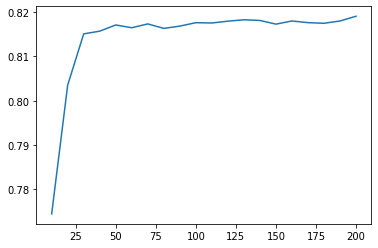

In [61]:
plt.plot(df_scores.n_estimators, df_scores.auc)

Grows until about 50 estimators, then kind of stagnates. Kind of stays in the 0.815
- Enough to use 50 experts, and say more do not help noticeably

Now we can tune our random forests with the same parameters are individual trees.
- Mainly, max_depth, starting with depths 5, 10 and 15

In [62]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [63]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


Can see different AUC with different number of estimators. Plotting th change for each max depth:

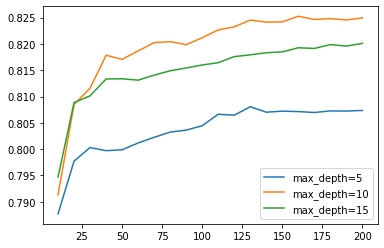

In [64]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

Max depth of 10 is the best, reaching diminishing returns around 125 estimators. At least 1% better than max depth 15 and about 2% better than max depth 5, so this is significant.

Now we want to check what is the best min samples per leaf to use:

In [65]:
# Best max depth from previous step
max_depth = 10

In [66]:
# May take some time
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [67]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058


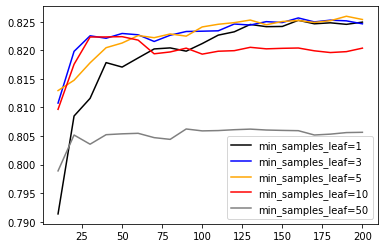

In [68]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

# We need to zip values and colors to associate the colors with the different data streams
for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

Looks like 1, 3, and 5. 10 is about 1% worse which is noticeably worse.
- May make more sense to use min_samples_leaf=3 as it increases the fastest.

Training with these parameters:

In [69]:
min_samples_leaf = 3

In [70]:
# Using 200 estimators as there is not much difference between 100 and 200
%time
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1,
                            # n_jobs=-1,
                            )
rf.fit(X_train, y_train)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

Will use this model later in our comparisons.

Other useful parameters:

* `max_features`
    - Specifies amount of features for each tree
* `bootstrap`
    - Basically adds randomization using different subsets of data
* `n_jobs`
    - Number of jobs to run in parallel. Can set to -1 to use all processors

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Recap
- Discussed intuition for ensembles (like board of experts)
- Random forest applies randomized decision trees *n* times
- Randomizes subset of features
- Tuned parameters like max depth and min samples per leaf

## 6.7 Gradient boosting and XGBoost

* Gradient boosting vs random forest
* Installing XGBoost
* Training the first model
* Performance monitoring
* Parsing xgboost's monitoring output

Recall: for random forests we make different random trees and take average of results for our prediction.

With **boosting** we train one model, take the predictions, and find the errors.
- Using these errors of the first model, we train another model, which makes predictions agains and find the errors.
- We train a third model that fixes the errors of the second model. We repeat for a while then combine multiple predictions

![Model boosting](images/6.7-boosting.PNG)

This is *sequential*, rather than parallel.

Can use **xgboost** library to facilitate this.

In [71]:
!pip install xgboost

In [72]:
import xgboost as xgb

Need to use *DMatrix* data structure to allow XGBoost to train faster (XGBoost is meant to be portable and efficient)

In [73]:
# Need feature names to make things easier
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

/home/andre/anaconda3/envs/exp-tracking-env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


xgb.train() function needs a params dictionary, dtrain matrix, and num_boost_round (number of trees to use, arbitrary large number).

In [74]:
xgb_params = {
    'eta': 0.3, # Essentially learning rate, about 0.3
    'max_depth': 6,
    'min_child_weight': 1, # Same as min_samples_leaf
    
    'objective': 'binary:logistic', # Objective, regression vs classification, and binary vs multiclass. Uses logistic regression
    'nthread': 6, # Number of threads to use
    
    'seed': 1, # Random 
    'verbosity': 1, # Amount to print, 0 is none, 1 shows warnings and errors
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

Now lets evaluate:

In [75]:
y_pred = model.predict(dval)

In [76]:
roc_auc_score(y_val, y_pred)

0.8152745150274878

Fairly good for not tuning at all and only 10 trees. XGBoost is prone to overfitting so we need to be careful with max depth and number of trees.

Can create **watchlist** to evaluate on certain data at every step of training.

In [77]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

%%capture captures all output (stdout, stderr) and we can use this to parse and read later 

In [78]:
%%capture output
# Captures output of cell into `output`

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc', # Need AUC to use as metric guiding training

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5, # Print watchlist every 5 steps
                  evals=watchlist)

In [79]:
s = output.stdout

In [80]:
print(s[:200])

[0]	train-auc:0.86300	val-auc:0.76818
[5]	train-auc:0.92863	val-auc:0.80606
[10]	train-auc:0.95002	val-auc:0.81558
[15]	train-auc:0.96558	val-auc:0.81680
[20]	train-auc:0.97316	val-auc:0.81775
[25]	tr


You can notice that train AUC trends toward 1 but val AUC peaks quickly and seems to decrease.
- Around steps 10-25, val AUC peaks

Let's model the train and val AUC for readability

In [81]:
# Saves iteration, train AUC, and val AUC into dataframe from XGB output
def parse_xgb_output(output):
    results = []

    # Note that output saves stdout as one string, so we have to split by \n the newline character
    for line in output.stdout.strip().split('\n'):
        # Each part of each line is split by tab
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [82]:
df_score = parse_xgb_output(output)
df_score.head()

,num_iter,train_auc,val_auc
0,0,0.86300,0.76818
1,5,0.92863,0.80606
2,10,0.95002,0.81558
3,15,0.96558,0.81680
4,20,0.97316,0.81775


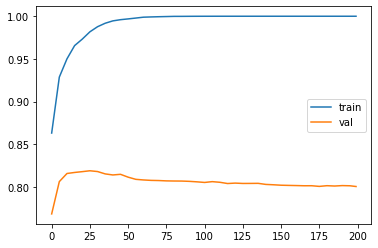

In [83]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

- Training overfits quickly and is almost perfect right after 50 iterations.
- Validation peaks quickly right after 30 iterations.

Let's look closely at validation AUC:

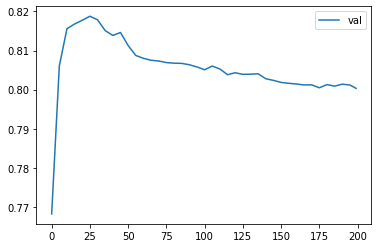

In [84]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

Peaks at 25 iterations and quickly declines as model overfits.

## 6.8 XGBoost parameter tuning

Tuning the following parameters:

* `eta`
    - Also called learning rate
    - Says how much weight predictions have in correcting next model
        - e.g. 0.3 only corrects 30% of errors
* `max_depth`
    - Same as before, max depth of trees
* `min_child_weight`
    - Same minimum samples per leaf

Generally trained in this order


Let's look at ETA:

In [85]:
# Save the output for the different ETA values in scores dict
scores = {}

In [86]:
%%capture output

xgb_params = {
    'eta': 1.0, # We will try 0.01, 0.05, 0.1, 0.3, 0.5, 1.0
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [87]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1.0'

In [88]:
scores.keys()

dict_keys(['eta=1.0'])

Let's plot these keys and scores:

KeyError: 'eta=0.3'

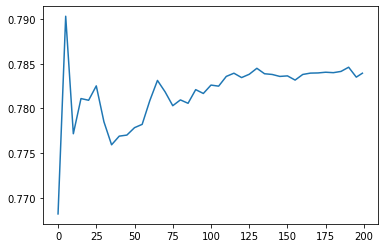

In [89]:
etas = ['eta=1.0', 'eta=0.3', 'eta=0.1']

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

- 1.0 is the worst, drops quickly after 0.
- 0.3 has a decent AUC at 25 iterations, then declines quickly
- 0.1 as decent AUC around 50 iterations and then degrades slowly after
    - Does not overfit as much as 0.3

In [90]:
etas = ['eta=0.3', 'eta=0.1', 'eta=0.01', 'eta=0.05']

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

KeyError: 'eta=0.3'

- 0.01 takes tiny steps and takes too long to learn
    - May be better but will take too long
- 0.05 takes 2x the iterations of 0.1 but the result is still a bit worse
- 0.1 still the best
    - Does not need a lot of trees and has the best performance

Now we want to look at the max depth parameter. Will use eta=0.1 and max_depth=3 as baseline.

In [91]:
scores = {}

In [92]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10, # Try 3, 4, 6, 10
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [93]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [94]:
del scores['max_depth=10']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


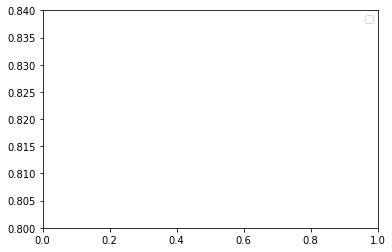

In [95]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.84)
plt.legend()

- Depth 10 is the worst at the start but stagnates after iteration 10
    - Can delete 10 from this plot above
- Depth 6 is also worse, and goes down faster
- Depth 4 is okay and stagnates after 75 iterations
- Depth 3 is the best and continues to 175 iterations before starting to overfit
    - Takes a lot of iterations but the size of each tree is very small so it needs many iterations
    - Many possible combinations needed to get any performance at this size.

Now tuning min_child_weight. Will use eta=0.1, max_depth=3 and min_child_weight=30 as baseline. 

In [96]:
scores = {}

In [97]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1, # Try 1, 10, 13
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [98]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

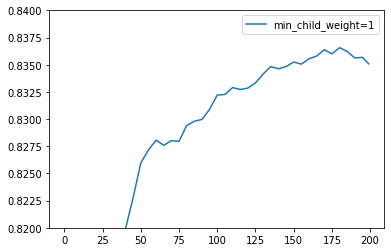

In [99]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.ylim(0.82, 0.84)
plt.legend()

All extremly close, between 0.83 and 0.84
- Can just go with 1 as the default


Training for 175 iterations with the found parameters seems like a good amount.

In [100]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

Alexey does not always plot in practice
- Just looks at row output in practice, write it down in Excel or something
- Plotting is nice for initial intuition but do not necessarily need this
    - Extra overhead

Other parameters: https://xgboost.readthedocs.io/en/latest/parameter.html

Useful ones:

* `subsample` and `colsample_bytree`
    - In random forest every tree can get a random subset of features
    - `colsample_bytree` controls subsampling for columns
    - `subsample` ratio for amount of training data. Occurs once per boosting iteration
    - Can try: 0.6, 0.3, etc
        - Starting at large intervals and tuning smaller ones around that
* `lambda` and `alpha`

### Summary
- Experimented with `eta`, `max_depth`, and `min_child_weight`.
- Other ways to tune but we tuned in the order they are listed in.
- Many more guides on hyperparameter tuning online.

## 6.9 Selecting the final model

* Choosing between xgboost, random forest and decision tree
* Training the final model
* Saving the model

Recap: trained 3 different tree based models
- DecisionTreeClassifier
- RandomForestClassifier
- XGBoost Boosted trees

Best shown below:

In [101]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [102]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.785470804775859

In [103]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [104]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [105]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [106]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8360387251459157

Now we see that XGBoost is the best model, we want to retrain with the final model with the whole train dataset.

In [107]:
# Just to get sequential vales
df_full_train = df_full_train.reset_index(drop=True)

In [108]:
# Getting target variable
y_full_train = (df_full_train.status == 'default').astype(int).values

In [109]:
# Removing target variable from training data
del df_full_train['status']

Making vectorized dictionary

In [110]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

Creating XGBoost DMatrix for train and test:

In [111]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())

/home/andre/anaconda3/envs/exp-tracking-env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [112]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [113]:
y_pred = model.predict(dtest)

In [114]:
roc_auc_score(y_test, y_pred)

0.8322662626460096

XGBoost is often one of the best models with tabular data.
- Downside is that XGBoost is more complex, harder to tune (more parameters), easier to overfit.

In [115]:
import bentoml
bentoml.xgboost.save_model("credit_risk_model", model)

Model(tag="credit_risk_model:roq6vjcubkeqiaav", path="/home/andre/bentoml/models/credit_risk_model/roq6vjcubkeqiaav/")

## 6.10 Summary

* Decision trees learn if-then-else rules from data.
* Finding the best split: select the least impure split. This algorithm can overfit, that's why we control it by limiting the max depth and the size of the group.
    - Also checks for `max_depth` and `min_samples_leaf`
* Random forest is a way of combining multiple decision trees. It should have a diverse set of models to make good predictions.
    - Like a board of experts reaching consensus on decision
    - Averages returned probablities; may weight these
* Gradient boosting trains model sequentially: each model tries to fix errors of the previous model. XGBoost is an implementation of gradient boosting.
    - Each tree tries to fix the mistakes the previous tree is making
    - Also checks for `eta`, `max_depth` and `min_child_weight` (like `min_samples_leaf`)
        - `eta` controls learning rate; amount of weight of last trees predictions to use to fix mistakes

## 6.11 Explore more

* For this dataset we didn't do EDA or feature engineering. You can do it to get more insights into the problem.
* For random forest, there are more parameters that we can tune. Check `max_features` and `bootstrap`.
* There's a variation of random forest caled "extremely randomized trees", or "extra trees". Instead of selecting the best split among all possible thresholds, it selects a few thresholds randomly and picks the best one among them. Because of that extra trees never overfit. In Scikit-Learn, they are implemented in `ExtraTreesClassifier`. Try it for this project.
* XGBoost can deal with NAs - we don't have to do `fillna` for it. Check if not filling NA's help improve performance.
* Experiment with other XGBoost parameters: `subsample` and `colsample_bytree`.
* When selecting the best split, decision trees find the most useful features. This information can be used for understanding which features are more important than otheres. See example here for [random forest](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html) (it's the same for plain decision trees) and for [xgboost](https://stackoverflow.com/questions/37627923/how-to-get-feature-importance-in-xgboost)
* Trees can also be used for solving the regression problems: check `DecisionTreeRegressor`, `RandomForestRegressor` and the `objective=reg:squarederror` parameter for XGBoost.